In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [4]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df["price"].median()

2401.0

In [9]:
y = df.pop('price')
X = df

print(y.shape)
print(X.shape)

(53940,)
(53940, 9)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.70,
                                                    random_state = 100)

print(X_train.shape[0])
print(X_test.shape[0])

37758
16182


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.75,
                                                    random_state = 100)

print(X_train.shape[0])
print(X_test.shape[0])

40455
13485


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.80,
                                                    random_state = 100)

print(X_train.shape[0])
print(X_test.shape[0])

43152
10788


In [13]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [14]:
X_train_cat = X_train.select_dtypes(include= ["object"])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [15]:
X_train_cat.head()

,cut,color,clarity
27187,Premium,I,SI1
3118,Ideal,H,VVS2
49238,Ideal,H,VVS1
53575,Ideal,E,VS2
29795,Premium,D,SI1


In [16]:
X_train_num.head()

,carat,depth,table,x,y,z
27187,2.01,60.2,59.0,8.18,8.12,4.91
3118,0.79,62.0,55.9,5.88,5.95,3.67
49238,0.64,61.1,55.0,5.58,5.61,3.43
53575,0.70,62.7,56.0,5.73,5.63,3.56
29795,0.30,61.6,58.0,4.32,4.29,2.65


## Standardization

In [17]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_transform = pd.DataFrame(scaler.fit_transform(X_train_num),
                                columns = X_train_num.columns,
                                index=X_train_num.index)

print("num of numerical features:", scaler.n_features_in_)
print("Feature names : ",scaler.get_feature_names_out())
print(" Mean of each column :", scaler.mean_)
print("Std of each column :", np.sqrt(scaler.var_))

X_train_num_transform.head()

num of numerical features: 6
Feature names :  ['carat' 'depth' 'table' 'x' 'y' 'z']
 Mean of each column : [ 0.79885915 61.75707499 57.45137189  5.73331039  5.73705413  3.54005423]
Std of each column : [0.47440497 1.43530908 2.23824184 1.12205226 1.14928833 0.69551824]


,carat,depth,table,x,y,z
27187,2.552968,-1.084836,0.691895,2.180549,2.073410,1.969676
3118,-0.018674,0.169249,-0.693121,0.130733,0.185285,0.186833
49238,-0.334860,-0.457793,-1.095222,-0.136634,-0.110550,-0.158233
53575,-0.208386,0.656949,-0.648443,-0.002950,-0.093148,0.028678
29795,-1.051547,-0.109436,0.245116,-1.259576,-1.259087,-1.279699


In [18]:
round(X_train_num_transform.describe())

,carat,depth,table,x,y,z
count,43152.0,43152.0,43152.0,43152.0,43152.0,43152.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-13.0,-6.0,-5.0,-5.0,-5.0
25%,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,9.0,12.0,17.0,4.0,46.0,6.0


In [19]:
X_train_num_transform["table"].median()

-0.20166359473949597

In [20]:
X_train_num.describe()

,carat,depth,table,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.798859,61.757075,57.451372,5.733310,5.737054,3.540054
std,0.474410,1.435326,2.238268,1.122065,1.149302,0.695526
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_num_transformation = pd.DataFrame(scaler.fit_transform(X_train_num),
                                          columns = scaler.get_feature_names_out(),
                                          index = X_train_num.index)

print("num of numerical features:", scaler.n_features_in_)
print("Feature names : ",scaler.get_feature_names_out())
print(" Min of each column :",scaler.min_)

X_train_num_transformation.head()

num of numerical features: 6
Feature names :  ['carat' 'depth' 'table' 'x' 'y' 'z']
 Min of each column : [-0.04158004 -1.19444444 -0.82692308  0.          0.          0.        ]


,carat,depth,table,x,y,z
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784


#### **Feature Engineering: Applying One-Hot Encoding on Categorical Features**

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder_= OneHotEncoder(sparse_output = False)

X_train_cat_transformed=pd.DataFrame(encoder_.fit_transform(X_train_cat),
                                        columns = encoder_.get_feature_names_out(),
                                        index = X_train_cat.index)

print("shape of Data before transformation:", X_train_cat.shape)
print("shape of Data after transformation:", X_train_cat_transformed.shape)


X_train_cat_transformed.head()

shape of Data before transformation: (43152, 3)
shape of Data after transformation: (43152, 20)


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3118,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49238,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after encoding: ['cut_Fair' 'cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_D'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_I1'
 'clarity_IF' 'clarity_SI1' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS1' 'clarity_VVS2']


In [24]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (43152, 3)
Shape of Data after Transformation: (43152, 17)


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53575,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after encoding: ['cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_E' 'color_F'
 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_IF' 'clarity_SI1'
 'clarity_SI2' 'clarity_VS1' 'clarity_VS2' 'clarity_VVS1' 'clarity_VVS2']


In [26]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (43152, 3)
Shape of Data after Transformation: (43152, 15)


,cut_Ideal,cut_Premium,cut_Very Good,cut_infrequent_sklearn,color_E,color_F,color_G,color_H,color_I,color_infrequent_sklearn,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_infrequent_sklearn
27187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49238,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53575,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Infrequent Categories", encoder_.infrequent_categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Infrequent Categories [array(['Fair'], dtype=object), array(['J'], dtype=object), array(['I1', 'IF', 'VVS1'], dtype=object)]
Feature Names after encoding: ['cut_Ideal' 'cut_Premium' 'cut_Very Good' 'cut_infrequent_sklearn'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I'
 'color_infrequent_sklearn' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS2' 'clarity_infrequent_sklearn']


#### **Feature Engineering: Applying Label Encoding on Categorical Features**

In [28]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
27187
3118
49238
53575
29795


In [29]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

# Apply Label Encoding
X_train_cat_transformed['cut'] = X_train_cat['cut'].map(cut_encoder)
X_train_cat_transformed['color'] = X_train_cat['color'].map(color_encoder)
X_train_cat_transformed['clarity'] = X_train_cat['clarity'].map(clarity_encoder)

X_train_cat_transformed.head()

,cut,color,clarity
27187,5,2,3
3118,4,3,6
49238,4,3,7
53575,4,6,4
29795,5,7,3


#### **Concatenate `X_train_num_transformed` and `X_train_cat_transformed`**

In [30]:
X_train_transformed = pd.concat([X_train_num_transformation, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181,5,2,3
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335,4,3,6
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558,4,3,7
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687,4,6,4
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784,5,7,3


### Step 5 - Preparing Test Data

**Note that, Step-4 is discussed after this.**

In [31]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [32]:

X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,carat,depth,table,x,y,z
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057


In [33]:
X_test_cat_transformed = pd.DataFrame(index = X_test_cat.index)

X_test_cat_transformed['cut'] = X_test_cat['cut'].map(cut_encoder)
X_test_cat_transformed['color'] = X_test_cat['color'].map(color_encoder)
X_test_cat_transformed['clarity'] = X_test_cat['clarity'].map(clarity_encoder)

X_test_cat_transformed.head()

,cut,color,clarity
52264,4,6,4
21073,4,4,5
42161,4,4,3
35974,4,5,5
7641,5,4,8


In [34]:
# Concatinate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948,4,6,4
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370,4,4,5
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022,4,4,3
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764,4,5,5
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057,5,4,8


### Step 4, 6 and 7 - Training and Testing Phase - **Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

795.5032235015317

In [36]:
output_df = pd.DataFrame({'Actual': y_test})

In [37]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
52264,2491,2368.769759
21073,9248,7476.762664
42161,1284,634.499192
35974,921,1525.882234
7641,4268,5726.849041
...,...,...
17694,7134,7778.223561
22403,10428,10725.714049
53573,2697,3336.221290
7941,4318,5254.508954


### Step 4, 6 and 7 - Training and Testing Phase - **KNN Regression**

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

376.82764182424916

In [39]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
52264,2491,2368.769759,1752.4
21073,9248,7476.762664,8778.4
42161,1284,634.499192,1251.2
35974,921,1525.882234,978.6
7641,4268,5726.849041,6203.2
...,...,...,...
17694,7134,7778.223561,7187.0
22403,10428,10725.714049,10118.8
53573,2697,3336.221290,2975.6
7941,4318,5254.508954,4913.0


### Step 4, 6 and 7 - Training and Testing Phase - **DT Regression**

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

349.2510351007292

In [41]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
52264,2491,2368.769759,1752.4,1915.0
21073,9248,7476.762664,8778.4,8121.0
42161,1284,634.499192,1251.2,1249.0
35974,921,1525.882234,978.6,1031.0
7641,4268,5726.849041,6203.2,4844.0
...,...,...,...,...
17694,7134,7778.223561,7187.0,7080.0
22403,10428,10725.714049,10118.8,10618.0
53573,2697,3336.221290,2975.6,2737.0
7941,4318,5254.508954,4913.0,4444.0


### Step 4, 6 and 7 - Training and Testing Phase - **Random Forest Regression**

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

263.74615513489414

In [43]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
52264,2491,2368.769759,1752.4,1915.0,1844.75
21073,9248,7476.762664,8778.4,8121.0,8436.56
42161,1284,634.499192,1251.2,1249.0,1241.14
35974,921,1525.882234,978.6,1031.0,1045.77
7641,4268,5726.849041,6203.2,4844.0,4169.68
...,...,...,...,...,...
17694,7134,7778.223561,7187.0,7080.0,7108.32
22403,10428,10725.714049,10118.8,10618.0,10335.44
53573,2697,3336.221290,2975.6,2737.0,2766.98
7941,4318,5254.508954,4913.0,4444.0,4370.11


## Comparing dall models

In [44]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,2491.0
1,Actual,9248.0
2,Actual,1284.0
3,Actual,921.0
4,Actual,4268.0


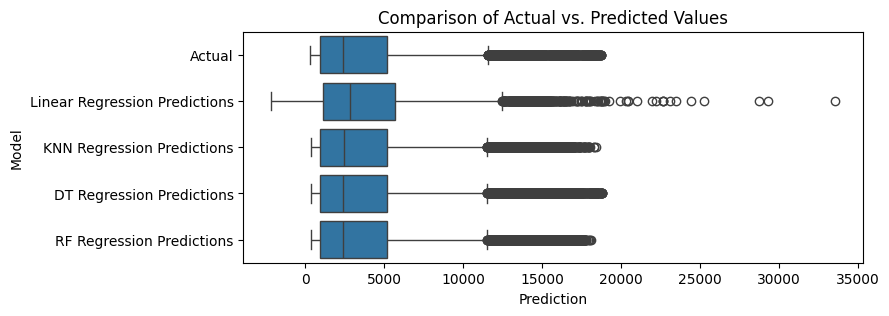

In [45]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

In [47]:
df = pd.read_csv(r"diamonds.csv")

In [48]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
X = df[["carat","depth", "table", "x", "y", "z"]]
y = df["price"]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [52]:
y_test_pred = regressor.predict(X_test)

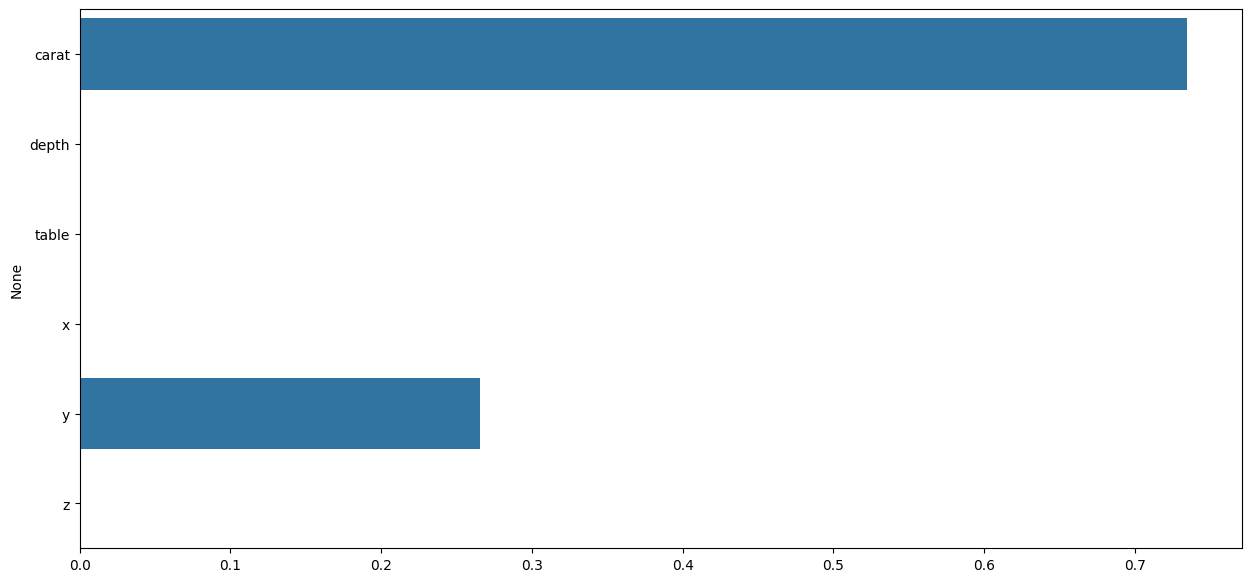

In [53]:
plt.figure(figsize=(15,7))

sns.barplot(x = regressor.feature_importances_, y = X_train.columns)

plt.show()

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
y_test_pred = regressor.predict(X_test)

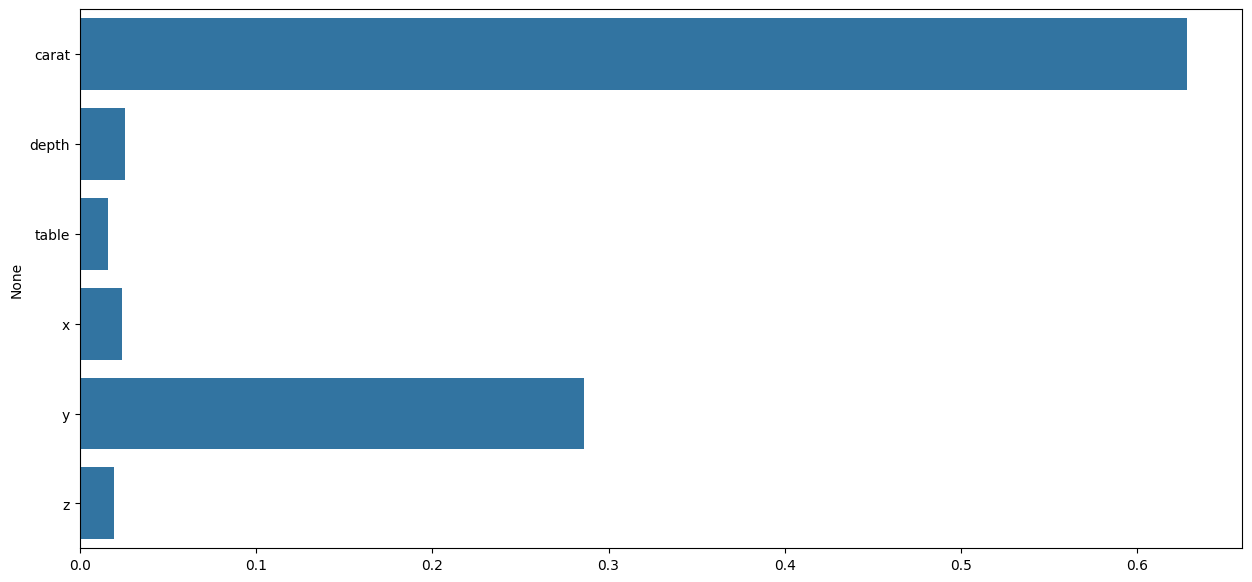

In [56]:
plt.figure(figsize=(15,7))

sns.barplot(x = regressor.feature_importances_, y = X_train.columns)

plt.show()

In [57]:
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181,5,2,3
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335,4,3,6
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558,4,3,7
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687,4,6,4
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784,5,7,3


In [75]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

In [69]:
X.shape

(53940, 6)

In [70]:
y.shape

(53940,)

In [71]:
X_train, X_test, Y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [73]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [76]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the regression pipeline
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [77]:
regression_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 15699331.698862702
R^2 Score: 0.0006594750909892921
